# <img style="float: left; padding-right: 30px; width: 225px" src="media/UC.png">  IMT2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-2**<br>
**Profesor:** Rodrigo A. Carrasco <br>
__**Integrantes:**__ Christian Camilo | Ignacio Moya | Simon Poblete | Tomás Romero | Benjamín Ruiz

# <h1><center>AVES DE CHILE</center></h1>

## 1.- Contexto y Motivación🦾
El proyecto se enfoca en analizar avistamientos de aves con el objetivo de comprender cómo eventos como la pandemia y los incendios forestales de 2017 han afectado estos avistamientos. La motivación surge de la importancia de entender la interacción entre la vida silvestre y eventos ambientales extremos, así como su interaccion con seres humanos.

## 2.- Preguntas objetivo❓
- ¿La frecuencia de avistamientos de aves, o la cantidad de especies vario con los incendios y pandemia, respecto a otros años?
- Si es asi, ¿Qué especies de aves se ven más afectadas?
- ¿Existe algún(os) tipo(s) de ave(s) que en base a estas problemáticas pueden estar en peligro de extinción?

## 3.- Datos🗒️
Para llevar a cabo este proyecto, aprovecharemos la API proporcionada por [eBird](https://documenter.getpostman.com/view/664302/S1ENwy59#5a1e27e9-128f-4ab5-80ad-88cd6de10026). Utilizamos esta interfaz para obtener datos sobre avistamientos de aves en territorio chileno desde 2015 hasta 2022, incluyendo información sobre la taxonomía de las aves y las ubicaciones específicas donde se realizaron los avistamientos. Además, disponemos de un conjunto de datos que contiene información sobre los incendios registrados en nuestro país. También contamos con un archivo SHP que proporciona información geoespacial sobre las distintas regiones de Chile.

## 4.- Librerías y carga de DF📚

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

pd.options.display.max_columns = None

In [75]:
# Aves y avistamientos
df_aves_15 = pd.read_csv("data/avistamientos/vis_2015.csv")
df_aves_16 = pd.read_csv("data/avistamientos/vis_2016.csv")
df_aves_17 = pd.read_csv("data/avistamientos/vis_2017.csv")
df_aves_18 = pd.read_csv("data/avistamientos/vis_2018.csv")
df_aves_19 = pd.read_csv("data/avistamientos/vis_2019.csv")
df_aves_20 = pd.read_csv("data/avistamientos/vis_2020.csv")
df_aves_21 = pd.read_csv("data/avistamientos/vis_2021.csv")
df_aves_22 = pd.read_csv("data/avistamientos/vis_2022.csv")

# Incendios forestales y daños, causas, ocurrencia
df_ocurrencia_incendios = pd.read_csv("data/incendios/data_limpio/ocurrencia_incendios_region_limpio.csv")
df_causas_incendios = pd.read_csv("data/incendios/data_limpio/causas_incendios_limpio.csv")
df_danos_superficie = pd.read_csv("data/incendios/data_limpio/danos_superficie (ha)_limpio.csv")
df_incendios = pd.read_csv("data/incendios/incendios_filtrados.csv")

df_danos_comuna_2014_2015 = pd.read_csv("data/incendios/dano_hectareas_comunas (2014 - 2015).csv")
df_danos_comuna_2015_2016 = pd.read_csv("data/incendios/dano_hectareas_comunas (2015 - 2016).csv")
df_danos_comuna_2016_2017 = pd.read_csv("data/incendios/dano_hectareas_comunas (2016 - 2017).csv")
df_danos_comuna_2017_2018 = pd.read_csv("data/incendios/dano_hectareas_comunas (2017 - 2018).csv")
df_danos_comuna_2018_2019 = pd.read_csv("data/incendios/dano_hectareas_comunas (2018 - 2019).csv")
df_danos_comuna_2019_2020 = pd.read_csv("data/incendios/dano_hectareas_comunas (2019 - 2020).csv")
df_danos_comuna_2020_2021 = pd.read_csv("data/incendios/dano_hectareas_comunas (2020 - 2021).csv")
df_danos_comuna_2021_2022 = pd.read_csv("data/incendios/dano_hectareas_comunas (2021 - 2022).csv")
df_danos_mes_2014_2015 = pd.read_csv("data/incendios/dano_hectareas_mes (2014 - 2015).csv")
df_danos_mes_2015_2016 = pd.read_csv("data/incendios/dano_hectareas_mes (2015 - 2016).csv")
df_danos_mes_2016_2017 = pd.read_csv("data/incendios/dano_hectareas_mes (2016 - 2017).csv")
df_danos_mes_2017_2018 = pd.read_csv("data/incendios/dano_hectareas_mes (2017 - 2018).csv")
df_danos_mes_2018_2019 = pd.read_csv("data/incendios/dano_hectareas_mes (2018 - 2019).csv")
df_danos_mes_2019_2020 = pd.read_csv("data/incendios/dano_hectareas_mes (2019 - 2020).csv")
df_danos_mes_2020_2021 = pd.read_csv("data/incendios/dano_hectareas_mes (2020 - 2021).csv")
df_danos_mes_2021_2022 = pd.read_csv("data/incendios/dano_hectareas_mes (2021 - 2022).csv")

## 5.- Pandemia😷

La pandemia de Covid-19 ocurrió entre 2020 y 2021, donde la mayor parte del tiempo entre estos años, estuvimos confinados en nuestros hogares, por lo tanto analizaremos el comportamiento de las aves avistadas en estos años, contrastandolos con los años 2019 y 2022

In [76]:
df_aves_19.head()

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,locationPrivate,exoticCategory,region
0,speduc2,Spectacled Duck,Speculanas specularis,L8345908,Salto del Laja,2019-01-01 20:32,2.0,-37.214814,-72.370441,True,-1,Bío-Bío
1,whfibi,White-faced Ibis,Plegadis chihi,L791057,Estero El Culebrón--Desembocadura,2019-01-01 18:14,15.0,-29.961702,-71.321821,False,-1,Coquimbo
2,gyhsif1,Gray-hooded Sierra Finch,Phrygilus gayi,L802007,Valle de las Termas del Plomo,2019-01-01 15:20,1.0,-33.631487,-69.924889,False,-1,Región Metropolitana de Santiago
3,wrlrus1,Wren-like Rushbird,Phleocryptes melanops,L3071230,laguna cercana a el kark,2019-01-01 15:00,4.0,-51.279643,-72.656021,True,-1,Magallanes
4,mcrtyr1,Many-colored Rush Tyrant,Tachuris rubrigastra,L3071230,laguna cercana a el kark,2019-01-01 15:00,1.0,-51.279643,-72.656021,True,-1,Magallanes


In [77]:
df_aves_19.sort_values(by="howMany", ascending=False).head(10)

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,locationPrivate,exoticCategory,region
356,sooshe,Sooty Shearwater,Ardenna grisea,L8576098,"(-44,777, -74,384)",2019-02-08 15:39,20000.0,-44.776836,-74.384086,True,-1,Aisén del General Carlos Ibáñez del Campo
1903,guacor1,Guanay Cormorant,Leucocarbo bougainvillii,L9883938,"CL (-20,298, -70,143)",2019-09-06 16:32,15000.0,-20.297630,-70.142652,True,-1,Tarapacá
2520,sooshe,Sooty Shearwater,Ardenna grisea,L10156891,"CL (-45,823, -74,921)",2019-11-08 15:53,10000.0,-45.823165,-74.920791,True,-1,Aisén del General Carlos Ibáñez del Campo
649,fragul,Franklin's Gull,Leucophaeus pipixcan,L668852,Río Lluta--Desembocadura,2019-03-17 18:48,6000.0,-18.416539,-70.322408,False,-1,Arica y Parinacota
3036,eleter1,Elegant Tern,Thalasseus elegans,L10385379,"31 dec. 2019 19:52\r\n-18,492, -70,329",2019-12-31 18:30,6000.0,-18.492109,-70.328532,True,-1,Arica y Parinacota
2252,guacor1,Guanay Cormorant,Leucocarbo bougainvillii,L796063,SN Campo dunar de Concón--Roca Oceánica,2019-10-16 12:30,5500.0,-32.941263,-71.554186,False,-1,Valparaíso
1133,slbpar1,Slender-billed Parakeet,Enicognathus leptorhynchus,L9296278,"U-99-V, Puerto Clocker, Región de los Lagos, C...",2019-05-18 16:14,5000.0,-41.006628,-72.673479,True,-1,Los Lagos
802,blnswa2,Black-necked Swan,Cygnus melancoryphus,L8972803,"(-39.686, -73.182)",2019-04-04 16:54,4700.0,-39.685692,-73.181934,True,-1,Los Ríos
513,perboo1,Peruvian Booby,Sula variegata,L602414,Acantilados de la Quirilluca,2019-02-28 10:59,4496.0,-32.687498,-71.449413,False,-1,Valparaíso
386,uplgoo1,Upland Goose,Chloephaga picta,L1033151,Laguna Los Palos,2019-02-13 18:10,3500.0,-52.735876,-71.061630,False,-1,Magallanes


In [78]:
df_aves_19.dtypes

speciesCode         object
comName             object
sciName             object
locId               object
locName             object
obsDt               object
howMany            float64
lat                float64
lng                float64
locationPrivate       bool
exoticCategory       int64
region              object
dtype: object

In [79]:
df_aves_19.groupby(by="comName").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)

,comName,howMany,lat,lng,locationPrivate,exoticCategory
305,Sooty Shearwater,30900.0,-145.841363,-215.594767,3,-3
157,Guanay Cormorant,24007.0,-192.646573,-429.987735,1,-6
283,Sanderling,11540.0,-798.587163,-1716.283294,3,-24
297,Slender-billed Parakeet,10519.0,-506.630941,-943.740630,8,-13
228,Peruvian Booby,6934.0,-144.942511,-289.701008,0,-4
...,...,...,...,...,...,...
139,Gray-breasted Martin,1.0,-18.216103,-69.301457,0,-1
0,African Black Duck,1.0,-36.827802,-73.038011,0,1
341,Vermilion Flycatcher,0.0,-18.828150,-70.136249,1,-1
82,Chilean Mockingbird,0.0,-33.426346,-70.805287,1,-1


## 6.- Incendios 🔥🌲

Los incendios también son una causa de preocupación ya que pueden afectar el hábitat de las aves. Es por esto de que analizaremos la cantidad total de incendios ocurridos en Chile durante los años 2015-2022, y veremos si existe una relación entre la cantidad de incendios y la cantidad de aves avistadas.

In [80]:
# Analizamos la ocurrencia de incendios en el país
df_ocurrencia_incendios.head()

,PERIODO,XV,I,II,III,IV,V,RM,VI,VII,XVI,VIII,IX,XIV,X,XI,XII,TOTAL
0,1976 - 1977,0,0,0,0,31,321,156,255,335,0,696,96,0,16,3,0,1909
1,1977 - 1978,0,0,0,0,16,479,293,240,405,0,1471,247,0,133,77,19,3380
2,1978 - 1979,0,0,0,0,10,670,267,281,627,0,1504,313,0,879,134,33,4718
3,1979 - 1980,0,0,0,0,41,907,212,212,271,0,668,178,0,405,73,10,2977
4,1980 - 1981,0,0,0,17,32,1163,474,270,247,0,970,459,0,484,70,11,4197


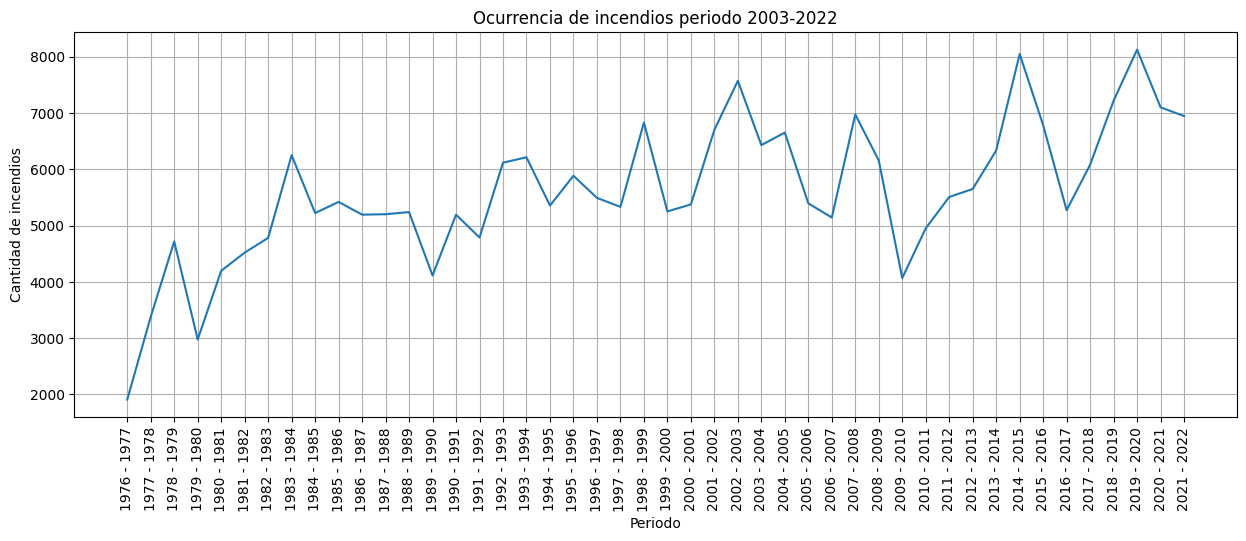

In [81]:
# Graficamos la ocurrencia de incendios periodo 2014-2022
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_ocurrencia_incendios, x="PERIODO", y="TOTAL")
plt.title("Ocurrencia de incendios periodo 2003-2022")
plt.xlabel("Periodo")
plt.ylabel("Cantidad de incendios")
plt.grid()
plt.xticks(rotation=90)
plt.show()


In [82]:
# Analizamos los daños por incendios en el país
df_danos_superficie.head()

,PERIODO,XV,I,II,III,IV,V,RM,VI,VII,XVI,VIII,IX,XIV,X,XI,XII,TOTAL
0,1976 - 1977,0.0,0.0,0.0,0.0,148.0,17264.0,613.0,4066.0,1263.0,0.0,2503.0,391.0,0.0,208.0,2.0,0.0,26458.0
1,1977 - 1978,0.0,0.0,0.0,0.0,43.0,1179.0,1664.0,2926.0,6604.0,0.0,9152.0,4740.0,0.0,1668.0,1006.0,981.0,29963.0
2,1978 - 1979,0.0,0.0,0.0,0.0,223.0,1763.0,2336.0,805.0,2401.0,0.0,9515.0,30365.0,0.0,24199.0,743.0,3865.0,76215.0
3,1979 - 1980,0.0,0.0,0.0,0.0,148.0,2237.0,1782.0,6325.0,3552.0,0.0,4560.0,2112.0,0.0,1493.0,243.0,83.0,22535.0
4,1980 - 1981,0.0,0.0,0.0,7.0,129.0,7345.0,2835.0,3491.0,4661.0,0.0,4373.0,1552.0,0.0,1042.0,6262.0,359.0,32056.0


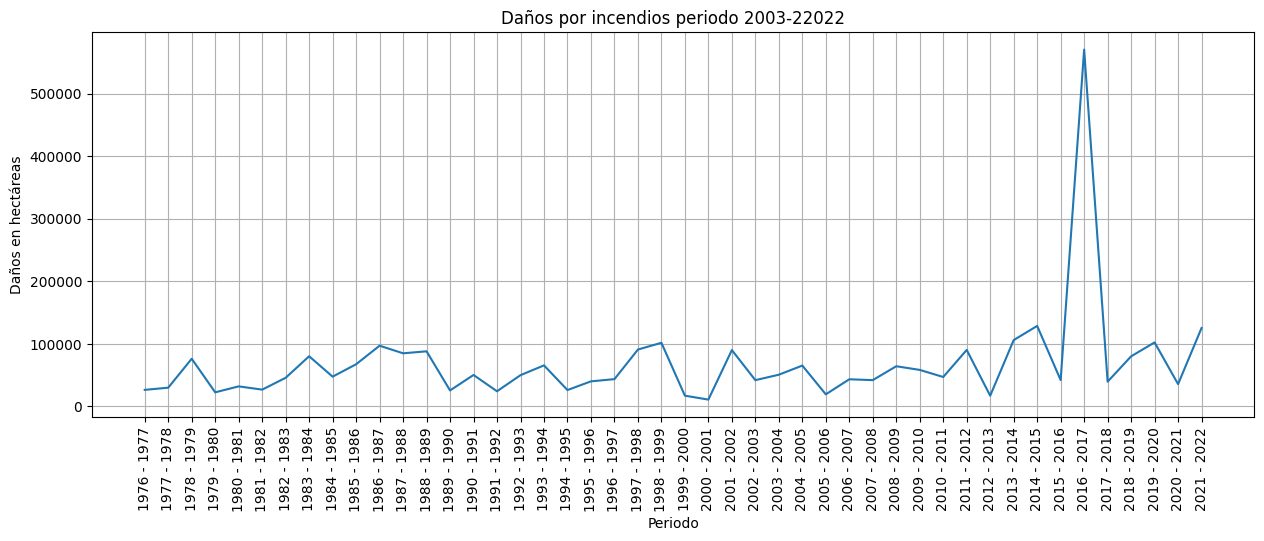

In [83]:
# Graficamos los daños por incendios periodo 2014-2022
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_danos_superficie, x="PERIODO", y="TOTAL")
plt.title("Daños por incendios periodo 2003-22022")
plt.xlabel("Periodo")
plt.ylabel("Daños en hectáreas")
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [84]:
df_danos_superficie[df_danos_superficie["TOTAL"] == df_danos_superficie["TOTAL"].max()]

,PERIODO,XV,I,II,III,IV,V,RM,VI,VII,XVI,VIII,IX,XIV,X,XI,XII,TOTAL
40,2016 - 2017,0.5,0.0,0.0,42.24,3639.83,27118.14,53235.73,105542.93,252556.1,0.0,119409.11,8361.48,94.5,127.3,7.54,61.99,570197.39


In [85]:
df_causas_incendios.head()

,AÑO,ACCIDENTALES,INTENCIONALES,NATURALES,DESCONOCIDAS
0,2003,3820,1714,4,2034
1,2004,3070,1190,23,2147
2,2005,3192,1763,18,1680
3,2006,3258,1741,6,391
4,2007,3286,1463,14,380


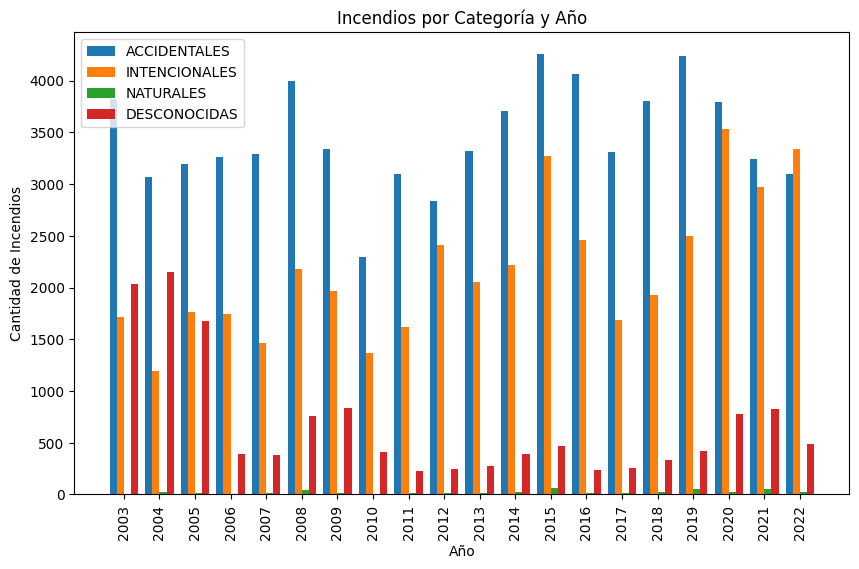

In [86]:
# Graficar los datos
fig, ax = plt.subplots(figsize=(10, 6))

# Barra para cada categoría
bar_width = 0.2
bar_positions = range(len(df_causas_incendios['AÑO']))

# Barra para ACCIDENTALES
plt.bar(bar_positions, df_causas_incendios['ACCIDENTALES'], width=bar_width, label='ACCIDENTALES')

# Barra para INTENCIONALES
plt.bar([p + bar_width for p in bar_positions], df_causas_incendios['INTENCIONALES'], width=bar_width, label='INTENCIONALES')

# Barra para NATURALES
plt.bar([p + 2 * bar_width for p in bar_positions], df_causas_incendios['NATURALES'], width=bar_width, label='NATURALES')

# Barra para DESCONOCIDAS
plt.bar([p + 3 * bar_width for p in bar_positions], df_causas_incendios['DESCONOCIDAS'], width=bar_width, label='DESCONOCIDAS')

# Configurar el eje x
plt.xlabel('Año')
plt.xticks([p + 1.5 * bar_width for p in bar_positions], df_causas_incendios['AÑO'])

# Configurar el eje y
plt.ylabel('Cantidad de Incendios')

# Añadir leyenda
plt.legend()

# Añadir título
plt.title('Incendios por Categoría y Año')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

In [87]:
df_causas_incendios[df_causas_incendios["ACCIDENTALES"] == df_causas_incendios["ACCIDENTALES"].max()]

,AÑO,ACCIDENTALES,INTENCIONALES,NATURALES,DESCONOCIDAS
12,2015,4252,3273,58,465


## ¿Qué podemos concluir de esto?

Podemos analizar que durante el año 2017, transcurrió uno de los eventos de incendio forestal más grande a nivel de superficie, esto nos indica que a pesar de que aquel año no tuvo una gran cantidad de incendios, este si tuvo uno de los más impactantes, debido a su gran tamaño y gran impacto medioambiental.